# Tâche 9 : Calcul de la vitesse du son pour trois branches acoustiques différentes

### Chargement de materiau et des packages

In [14]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.phonon.bandstructure import PhononBandStructure
import numpy as np
import matplotlib.pyplot as plt


with MPRester("aCXeRIqRipXfPPtsLI7") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-961675")
    band = m.get_phonon_bandstructure_by_material_id("mp-961675")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



### Représentation de la zone de Brillouin et de la structure de bande

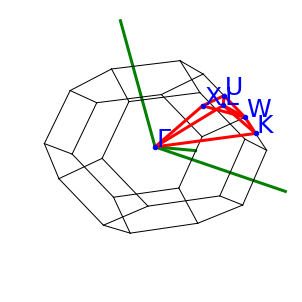

In [15]:

plot = PhononBSPlotter(band)
plot.plot_brillouin()

Dans cette représentation, on peut voir la structure de bande des phonons. Les lettres (K,U,L,W,X) sont les différents sommets des directions de la zone de brillouin.

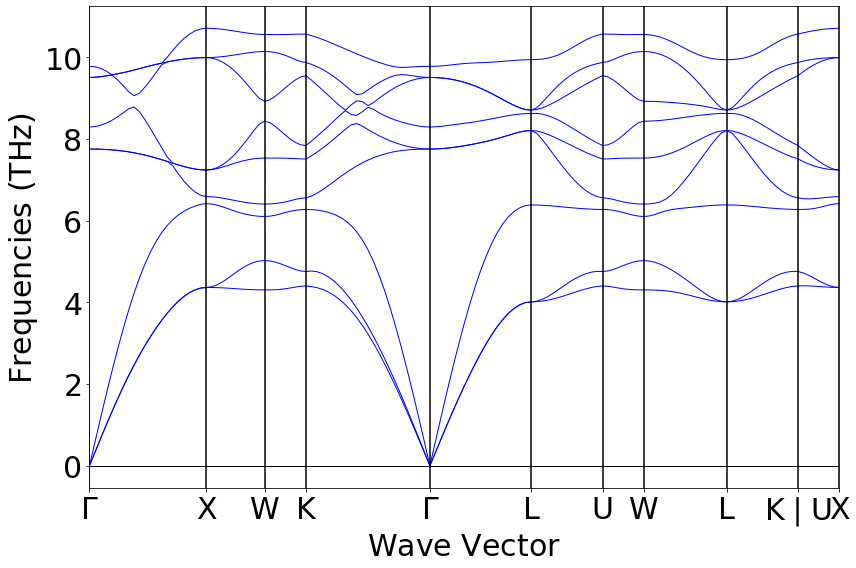

In [16]:
plot.bs_plot_data()
plot.show()

Ce graph illustre la structure de bande  du cristal, c'est à dire  les relations de dispersions pour chaque direction.

### Calcul de la vitesse du son

Pour calculer la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin, on utilise les relations/approximations suivantes :

- L'équation de l'evolution la pulsation d'un phonon ($ \omega_k $) par rapport à k, son nombre d'onde  :  $\omega_k = \sqrt{2\omega^2(1-\cos{(ka)})}$

Cette relation est la relation de dispertion. Elle est utile pour trouver la vitesse à laquelle le phonon se propage, la pente de $\omega_k$ est en fait la vitesse de propagation du son dans le milieu consideré. Lorsque que k, le nombre d'onde est petit, l'approximation de la courbe par une droite devient assez précise pour qu'on puisse utiliser un modèle linéaire.

- L'approximation de Debye, stipulant que $\omega = v_s . \lVert  q  \rVert $. Dans cette équation $\omega$ est la  pulsation d'un phonon, $ v_s $ est la vitesse du son et $ \lVert  q  \rVert$ est la norme du vecteur d'onde 

Cette équation permet en fait de calculer la pente à l'origine de l'approximation linéaire de la branche qui nous interesse.

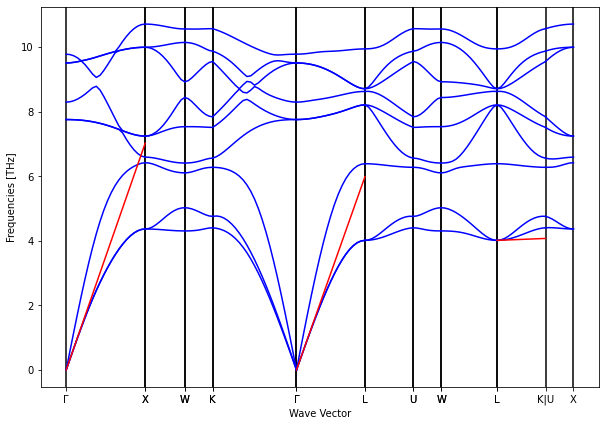

Vitesse du son dans la 1er branche acoustique (direction Γ - X):3941.6866598070264 m/s 

Vitesse du son dans la 2em branche acoustique (direction Γ - L) :3877.6147474692957 m/s 

Vitesse du son dans la 3em branche acoustique (direction L - K|U) :55.065161053702525 m/s 



In [17]:

ticks= plot.get_ticks() 
data = plot.bs_plot_data()

figure,axes = plt.subplots(1,1,figsize=(10,7))

#le graph de base
for i in range(len(ticks['distance'])):
    plt.axvline(ticks['distance'][i],0,color="black")

for i in range(len(data['distances'])):
    for j in range(len(data['frequency'][i])):
        plt.plot(data['distances'][i],data['frequency'][i][j],'b')
        
axes.set_xticks(ticks['distance'])
axes.set_xticklabels(['Γ',"",'X',"","W","",'K',"",'Γ',"","L","",'U',"",'W',"","L",'K|U','X'])
axes.set_xlabel('Wave Vector')
axes.set_ylabel('Frequencies [THz]')

#pour tracer les pentes

def data_plt(data, band_num):
    x = data['distances'][band_num]
    y = data['frequency'][band_num][0]
    slope = (y[1]-y[0]) /(x[1]-x[0]) 
    y_arr = slope*(np.array(x)-x[0]) + y[0] 
    return [x,y_arr,slope]

first = data_plt(data,0)
plt.plot(first[0],first[1], color = 'r')

sec = data_plt(data,4)
plt.plot(sec[0],sec[1], color = 'r')

thi = data_plt(data,8)
plt.plot(thi[0],thi[1], color = 'r')


plt.show()


print("Vitesse du son dans la 1er branche acoustique (direction Γ - X):"+str(2*np.pi*first[2]*100)+" m/s \n")

print("Vitesse du son dans la 2em branche acoustique (direction Γ - L) :"+str(2*np.pi*sec[2]*100)+" m/s \n")

print("Vitesse du son dans la 3em branche acoustique (direction L - K|U) :"+str(2*np.pi*thi[2]*100)+" m/s \n")

On observe que pour les directions Γ - X et Γ - L, les vitesses du son sont relativement similaires (presque 4 km/s) alors que dans la direction L - K|U, la vitesse est beaucoup plus faible (visuellement, la pente est dans cette direction est bien plus petite).  